# Importing the data

In [174]:
#importing useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#importing the csv arquives
precos = pd.read_csv("precos.csv", sep = ";")
pesos = pd.read_csv("pesos.csv", sep = ";")

# Question 1A

In [49]:
#Filling empty values (NA) with the last value of the series before the NA value. 
precos.fillna(method="ffill", inplace = True)
pesos.fillna(method="ffill", inplace = True)

# Question 1B

In [42]:
#Visualizing the shape of the dataset (row, columns)
print("preços:",precos.shape)
print("pesos:",pesos.shape)

preços: (1368, 32)
pesos: (1368, 13)


In [61]:
#Printing the different assets between the two datasets

print(precos.columns.symmetric_difference(pesos.columns))

Index(['Benchmark Mercado', 'GGGG3', 'Risk Free', 'TTTT4', 'Unnamed: 12',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')


In [55]:
#Plus - finding common assets

common_columns = precos.columns.intersection(pesos.columns)
 
#Printing common columns
print("Common Columns:", common_columns)

Common Columns: Index(['date', 'AAAA3', 'BBBB3', 'CCCC4', 'DDDD3', 'EEEE3', 'FFFF3', 'ZZZZ3',
       'YYYY3', 'WWWW3', 'HHHH3'],
      dtype='object')


# Question 1C

In [112]:
#droping useless columns and storing the new dataframe in precos2

precos2 = precos.drop(precos.columns[14:], axis = 1)

#Creating a dataframe with daily returns and droping the "date" column
daily_returns = precos2.iloc[:,1:].pct_change(1)

#alternative to delete cells
#daily_returns.dropna(inplace = True)

#setting the date as the index of the dataframe
daily_returns.set_index(precos['date'], inplace = True)

#Deleting the first row of the dataframe
daily_returns = daily_returns.iloc[1:]

#printing
daily_returns

,AAAA3,BBBB3,CCCC4,DDDD3,EEEE3,FFFF3,GGGG3,ZZZZ3,YYYY3,WWWW3,HHHH3,Benchmark Mercado,Risk Free
date,,,,,,,,,,,,,
02/01/17,-0.023033,-0.015591,-0.024457,-0.021795,0.031360,0.037058,0.033058,0.041858,-0.002965,-0.017347,-0.005200,-0.011803,0.000584
03/01/17,0.065409,0.053159,0.054298,0.059045,-0.024997,0.006855,0.001455,0.004855,0.034975,0.041848,-0.009100,0.037041,0.036191
04/01/17,-0.005829,-0.003100,-0.024155,-0.023666,-0.006911,-0.001902,0.018098,0.009798,0.011996,-0.000488,-0.009200,-0.002561,-0.002886
05/01/17,0.021763,0.010470,0.029513,0.003254,0.008500,0.083293,0.077593,0.085493,0.000000,0.019386,-0.002800,0.009525,0.008900
06/01/17,0.000000,0.003875,-0.016904,0.002388,0.017050,-0.042856,-0.034856,-0.025656,0.008421,0.010875,0.004500,-0.007085,-0.009285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23/03/22,0.001092,0.022399,-0.009374,-0.005084,-0.022222,-0.017533,-0.008133,-0.015233,-0.006036,-0.009186,0.022694,-0.000373,0.001702
24/03/22,0.012461,0.006644,0.004595,0.017416,0.023903,0.040342,0.045442,0.044442,0.002234,0.011808,-0.035477,0.014509,0.012584
25/03/22,-0.008842,-0.013501,-0.026436,-0.007454,0.005106,0.002377,-0.019823,-0.010923,-0.004548,-0.000277,-0.008700,-0.001538,-0.001513


In [99]:
#Printing the standard deviation of daily returns
print(daily_returns.std())

AAAA3                0.028743
BBBB3                0.029625
CCCC4                0.026168
DDDD3                0.023388
EEEE3                0.037819
FFFF3                0.036277
GGGG3                0.036743
ZZZZ3                0.036409
YYYY3                0.019729
WWWW3                0.020723
HHHH3                0.040893
Benchmark Mercado    0.016315
Risk Free            0.016481
dtype: float64


In [97]:
#printing the mean of daily returns
print(daily_returns.mean())

AAAA3                0.001051
BBBB3                0.001190
CCCC4                0.001392
DDDD3                0.001661
EEEE3                0.000526
FFFF3                0.002209
GGGG3                0.002319
ZZZZ3                0.002273
YYYY3                0.000747
WWWW3                0.000809
HHHH3                0.002042
Benchmark Mercado    0.000653
Risk Free            0.000650
dtype: float64


In [98]:
#printing the median of daily returns
print(daily_returns.median())

AAAA3                0.000060
BBBB3                0.001157
CCCC4                0.000262
DDDD3                0.001211
EEEE3               -0.002477
FFFF3               -0.000282
GGGG3                0.000300
ZZZZ3                0.000367
YYYY3                0.000566
WWWW3                0.000506
HHHH3                0.000000
Benchmark Mercado    0.000836
Risk Free            0.000721
dtype: float64


In [116]:
#Printing the standard deviation of annual returns
print(daily_returns.std()*(252**0.5))

AAAA3                0.456276
BBBB3                0.470277
CCCC4                0.415408
DDDD3                0.371275
EEEE3                0.600357
FFFF3                0.575885
GGGG3                0.583279
ZZZZ3                0.577971
YYYY3                0.313184
WWWW3                0.328960
HHHH3                0.649163
Benchmark Mercado    0.258985
Risk Free            0.261631
dtype: float64


# Question 1D

In [127]:
#droping useless columns and storing the new dataframe in precos2
precos2 = precos.drop(precos.columns[14:], axis = 1)

#Creating a dataframe with 40 days returns and droping the "date" column
fourty_returns = precos2.iloc[:,1:].pct_change(40)

#setting the date as the index of the dataframe
fourty_returns.set_index(precos['date'], inplace = True)

# deleting empty cells 
fourty_returns.dropna(inplace = True)

#printing
fourty_returns

,AAAA3,BBBB3,CCCC4,DDDD3,EEEE3,FFFF3,GGGG3,ZZZZ3,YYYY3,WWWW3,HHHH3,Benchmark Mercado,Risk Free
date,,,,,,,,,,,,,
24/02/17,-0.031134,0.031788,0.300759,0.133004,0.537354,0.417234,0.537372,0.553341,0.221834,0.190203,-0.005145,0.111904,0.140617
27/02/17,-0.017713,0.048444,0.334436,0.160565,0.484050,0.373015,0.486837,0.492276,0.213580,0.201040,-0.008046,0.126901,0.139809
28/02/17,-0.086686,-0.007763,0.272671,0.098489,0.522403,0.351939,0.490171,0.499026,0.177377,0.160982,0.008472,0.084395,0.097028
01/03/17,-0.054078,0.014297,0.331891,0.181100,0.528390,0.413871,0.544798,0.553242,0.165526,0.164318,0.018752,0.092726,0.107275
02/03/17,-0.098458,-0.023820,0.223555,0.183420,0.549721,0.341085,0.466142,0.477164,0.139953,0.137282,0.019263,0.061550,0.077008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23/03/22,-0.106903,0.016219,0.194923,0.162564,-0.113404,-0.135835,-0.060066,-0.099618,0.068016,0.098679,-0.156372,0.059438,0.063409
24/03/22,-0.105257,0.016572,0.207594,0.118909,-0.178013,-0.118077,-0.050303,-0.083519,0.059757,0.102392,-0.184561,0.064133,0.068422
25/03/22,-0.084478,0.044361,0.180890,0.134022,-0.175020,-0.113889,-0.064206,-0.087727,0.042290,0.080608,-0.190360,0.068968,0.073520


In [128]:
#Printing the standard deviation of fourty days returns
print(fourty_returns.std())

AAAA3                0.028743
BBBB3                0.029625
CCCC4                0.026168
DDDD3                0.023388
EEEE3                0.037819
FFFF3                0.036277
GGGG3                0.036743
ZZZZ3                0.036409
YYYY3                0.019729
WWWW3                0.020723
HHHH3                0.040893
Benchmark Mercado    0.016315
Risk Free            0.016481
dtype: float64


In [129]:
#printing the median of fourty days returns
print(fourty_returns.median())

AAAA3                0.038860
BBBB3                0.042742
CCCC4                0.045019
DDDD3                0.046910
EEEE3               -0.039996
FFFF3                0.071824
GGGG3                0.086278
ZZZZ3                0.090377
YYYY3                0.032347
WWWW3                0.021871
HHHH3               -0.018806
Benchmark Mercado    0.028914
Risk Free            0.027054
dtype: float64


In [130]:
#printing the mean of fourty days returns
print(fourty_returns.mean())

AAAA3                0.045111
BBBB3                0.047341
CCCC4                0.045853
DDDD3                0.063730
EEEE3                0.010351
FFFF3                0.088747
GGGG3                0.089699
ZZZZ3                0.088662
YYYY3                0.026747
WWWW3                0.028959
HHHH3                0.117911
Benchmark Mercado    0.023311
Risk Free            0.022657
dtype: float64


# Question 1E

In [139]:
#droping useless columns and storing the new dataframe in precos2

precos2 = precos.drop(precos.columns[14:], axis = 1)

#setting the date as the index of the dataframe

precos2.set_index(precos['date'], inplace = True)

#droping the "date" column

precos2 = precos2.drop(precos.columns[:1], axis = 1)

#printing

precos2.head(5)

,AAAA3,BBBB3,CCCC4,DDDD3,EEEE3,FFFF3,GGGG3,ZZZZ3,YYYY3,WWWW3,HHHH3,Benchmark Mercado,Risk Free
date,,,,,,,,,,,,,
30/12/16,15.329000,9.213000,18.090000,3.505000,3.719000,3.401000,5.633000,2.401000,6.080000,12.369000,2.600000,1000.000000,30.000000
02/01/17,14.975929,9.069362,17.647573,3.428609,3.835627,3.527033,5.819214,2.501500,6.061975,12.154432,2.586480,988.197164,30.017527
03/01/17,15.955492,9.551482,18.605808,3.631052,3.739747,3.551211,5.827681,2.513645,6.273995,12.663076,2.562943,1024.801445,31.103906
04/01/17,15.862489,9.521872,18.156385,3.545119,3.713902,3.544457,5.933152,2.538274,6.349256,12.656898,2.539364,1022.176681,31.014132
05/01/17,16.207703,9.621570,18.692237,3.556654,3.745470,3.839685,6.393522,2.755279,6.349256,12.902261,2.532254,1031.912675,31.290151


In [146]:
#setting the dataset to a 100 basis and storing it in precos100 for better visualizing
precos100 = precos2/precos2.iloc[0]*100

<AxesSubplot:xlabel='date'>

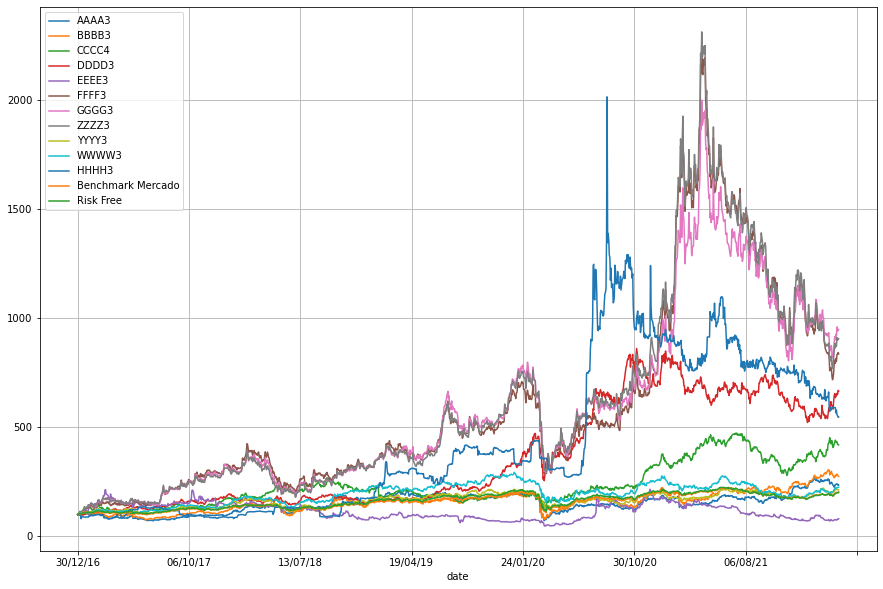

In [170]:
#plotting the graph
precos100.plot(figsize = (15,10), grid= True)

<AxesSubplot:xlabel='date'>

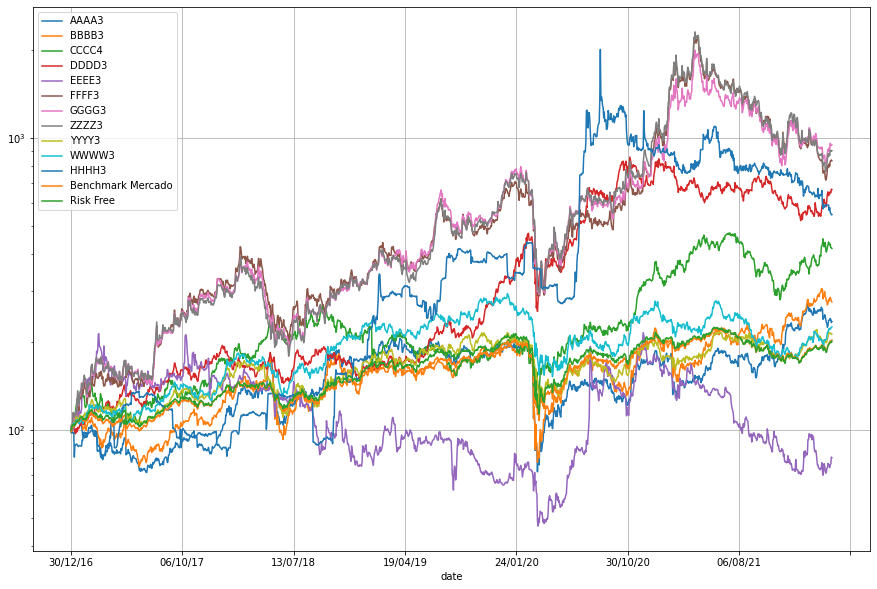

In [171]:
#ploting the graph in a logarithmic scale
precos100.plot(figsize = (15,10), grid= True, logy= True)

# Question 1F

In [163]:
#importing the csv arquives without filling or dropping NaN values
precos = pd.read_csv("precos.csv", sep = ";")
pesos = pd.read_csv("pesos.csv", sep = ";")

In [164]:
#visualizing the empty values for each series
precos.isna().sum()

date                    0
AAAA3                   6
BBBB3                   6
CCCC4                   4
DDDD3                   5
EEEE3                   4
FFFF3                   4
GGGG3                   3
ZZZZ3                   3
YYYY3                   5
WWWW3                  11
HHHH3                  20
Benchmark Mercado       3
Risk Free               0
Unnamed: 14          1368
Unnamed: 15          1368
Unnamed: 16          1368
Unnamed: 17          1368
Unnamed: 18          1368
Unnamed: 19          1368
Unnamed: 20          1368
Unnamed: 21          1368
Unnamed: 22          1368
Unnamed: 23          1368
Unnamed: 24          1368
Unnamed: 25          1368
Unnamed: 26          1368
Unnamed: 27          1368
Unnamed: 28          1368
Unnamed: 29          1368
Unnamed: 30          1368
Unnamed: 31          1368
dtype: int64

<AxesSubplot:>

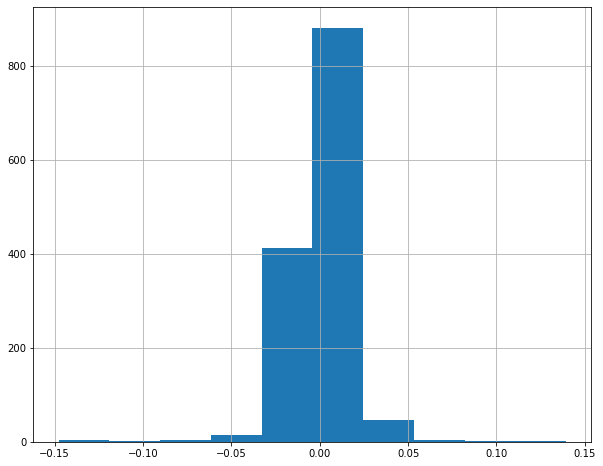

In [172]:
#Risk Free has 0 missing values. Therefore it is the choosed for plotting the histogram

Risk_Free_return = precos['Risk Free'].pct_change(1)

Risk_Free_return.hist(figsize = (10,8))

# Draft 

In [47]:
pesos.isna().sum()

date              0
AAAA3             0
BBBB3             0
CCCC4             0
DDDD3             0
EEEE3             0
FFFF3             0
ZZZZ3             0
YYYY3             0
WWWW3             0
TTTT4             0
HHHH3             0
Unnamed: 12    1368
dtype: int64

In [94]:
precos['Risk Free']

0       30.000000
1       30.017527
2       31.103906
3       31.014132
4       31.290151
          ...    
1363    59.293683
1364    60.039849
1365    59.949011
1366    59.725202
1367    60.404555
Name: Risk Free, Length: 1368, dtype: float64

In [48]:
precos.isna().sum()

date                    0
AAAA3                   0
BBBB3                   0
CCCC4                   0
DDDD3                   0
EEEE3                   0
FFFF3                   0
GGGG3                   0
ZZZZ3                   0
YYYY3                   0
WWWW3                   0
HHHH3                   0
Benchmark Mercado       0
Risk Free               0
Unnamed: 14          1368
Unnamed: 15          1368
Unnamed: 16          1368
Unnamed: 17          1368
Unnamed: 18          1368
Unnamed: 19          1368
Unnamed: 20          1368
Unnamed: 21          1368
Unnamed: 22          1368
Unnamed: 23          1368
Unnamed: 24          1368
Unnamed: 25          1368
Unnamed: 26          1368
Unnamed: 27          1368
Unnamed: 28          1368
Unnamed: 29          1368
Unnamed: 30          1368
Unnamed: 31          1368
dtype: int64

In [64]:
precos.columns

Index(['date', 'AAAA3', 'BBBB3', 'CCCC4', 'DDDD3', 'EEEE3', 'FFFF3', 'GGGG3',
       'ZZZZ3', 'YYYY3', 'WWWW3', 'HHHH3', 'Benchmark Mercado', 'Risk Free',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [67]:
precos.columns[14:]

Index(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')